![](itd2.png)
 
    
**Inteligencia Artificial:**
**Verificacion de velocidad de internet**

**Nombre del docente:**
**Jose Gabriel Rodriguez Rivas**

**Nombre del alumno:**
**Vergara Hernandez Jesus Alejandro**

**Situación/Contexto
En la primera parte de esta práctica de laboratorio, aprenderá cómo responder preguntas de manera científica a través de datos. Utilizará estadísticas descriptivas y gráficos para determinar la velocidad de Internet y visualizar los resultados. Su análisis se realizará a través de Scikit-Learn, Pandas y Matplotlib.**

**En la segunda parte de esta práctica de laboratorio aprenderá a reportar hallazgos cuantitativos y a sustentar conclusiones de manera científica. Ilustrará sus resultados con gráficos, para asegurarse de que sean lo más claros y concluyentes posible. Generará gráficos de aspecto profesional por medio de la biblioteca Seaborn, u otros estilos como FiveThirtyEight.**

**Parte 1: Determinar si la velocidad de Internet proporcionada cumple con la establecida en el contrato del proveedor**

*Paso 1: Importación y limpieza de datos*

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

In [3]:
df_compact = pd.read_csv('rpi_data_processed.csv')
df_compact.head()

,Upload (Mbit/s),Date,Time,Ping (ms),Download (Mbit/s)
0,14.31,2016-11-24,13:36:25,26.992,91.80
1,14.12,2016-11-24,13:36:55,24.532,88.19
2,14.11,2016-11-24,13:37:25,20.225,59.86
3,14.22,2016-11-24,13:37:57,19.332,91.81
4,14.08,2016-11-24,13:38:27,22.494,92.05


In [4]:
df_compact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Upload (Mbit/s)    673 non-null    float64
 1   Date               673 non-null    object 
 2   Time               673 non-null    object 
 3   Ping (ms)          673 non-null    float64
 4   Download (Mbit/s)  673 non-null    float64
dtypes: float64(3), object(2)
memory usage: 26.4+ KB


In [5]:
#Convertir los valores de ping y de descarga en flotantes
df_compact['Ping (ms)'] = df_compact['Ping (ms)'].apply(lambda val: float(val))
df_compact['Download (Mbit/s)'] = df_compact['Download (Mbit/s)'].apply(lambda val: float(val))

In [6]:
df_compact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Upload (Mbit/s)    673 non-null    float64
 1   Date               673 non-null    object 
 2   Time               673 non-null    object 
 3   Ping (ms)          673 non-null    float64
 4   Download (Mbit/s)  673 non-null    float64
dtypes: float64(3), object(2)
memory usage: 26.4+ KB


### Paso 2: Comprensión de la Promesa

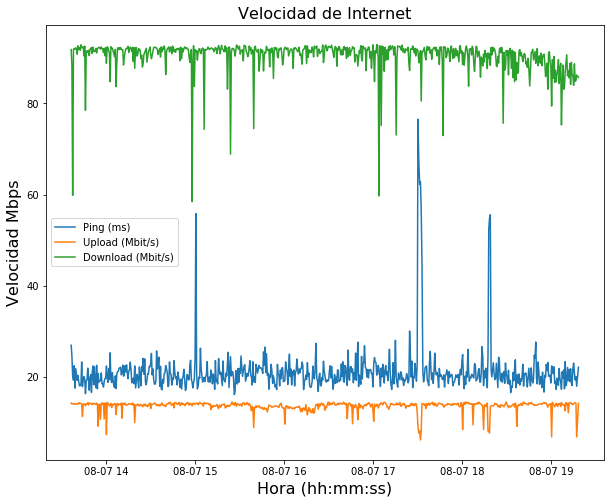

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot three curves
t = pd.to_datetime(df_compact['Time'])
ax.plot(t, df_compact['Ping (ms)'], label='Ping (ms)')
ax.plot(t, df_compact['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df_compact['Download (Mbit/s)'], label='Download (Mbit/s)')

# Insert legend
ax.legend()

# Add axis labels and title
ax.set_xlabel('Hora (hh:mm:ss)', size = 16)
ax.set_ylabel('Velocidad Mbps', size = 16)
ax.set_title('Velocidad de Internet', size = 16)

# Change tick size
ax.tick_params(labelsize=10)

In [8]:
acceptable_upload = 13 #Mbit/s
acceptable_download = 88 #Mbit/s
acceptable_ping = 20 #ms

### Paso 3: Comparación con Expectativas

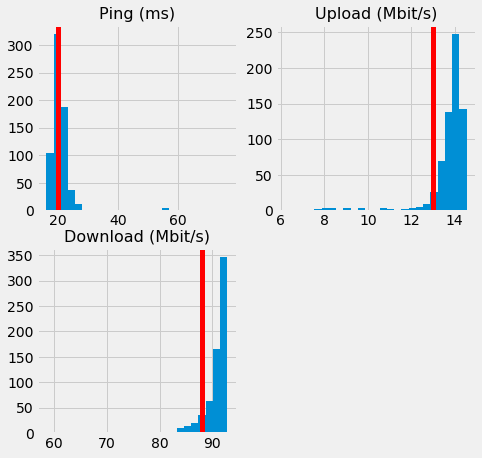

In [9]:
with plt.style.context('fivethirtyeight'):
    # Initialize figure
    fig, ax = plt.subplots(2,2,figsize=(7, 7))
    ax[0][0].hist(df_compact['Ping (ms)'], 25)
    # plot acceptable ping 
    ax[0][0].axvline(acceptable_ping, color='red', linewidth=5)
    ax[0][0].set_title('Ping (ms)', fontsize=16)
    # plot upload speed
    ax[0][1].hist(df_compact['Upload (Mbit/s)'], 25)
    # plot acceptable upload
    ax[0][1].axvline(acceptable_upload, color='red', linewidth=5)
    ax[0][1].set_title('Upload (Mbit/s)', fontsize=16)
    # plot download speed
    ax[1][0].hist(df_compact['Download (Mbit/s)'], 25)
    # plot acceptable download
    ax[1][0].axvline(acceptable_download, color='red', linewidth=5)
    ax[1][0].set_title('Download (Mbit/s)', fontsize=16)
    ax[1][1].set_visible(False)

In [10]:
means = df_compact.mean()
stands = df_compact.std()

In [11]:
quote_ping = (means['Ping (ms)'], stands['Ping (ms)'])
quote_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
quote_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])

# print the results
print('Tiempo promedio de ping: {} ± {} ms'.format(*quote_ping))
print('Tiempo promedio de Download: {} ± {} ms'.format(*quote_download))
print('Tiempo promedio de Upload: {} ± {} ms'.format(*quote_upload))
print('')
print('Distancia entre la velocidad de ping aceptable y la media: {:.2f} desviacion estandar'.format((quote_ping[0]-acceptable_ping)/quote_ping[1]))
print('Distancia entre la velocidad de download aceptable y la media: {:.2f} desviacion estandar'.format((quote_download[0]-acceptable_download)/quote_download[1]))
print('Distancia entre la velocidad de upload aceptable y la media: {:.2f} desviacion estandar'.format((quote_upload[0]-acceptable_upload)/quote_upload[1]))

Tiempo promedio de ping: 21.115451708766724 ± 5.161225495663228 ms
Tiempo promedio de Download: 90.44921248142644 ± 3.4656470318152284 ms
Tiempo promedio de Upload: 13.697607726597328 ± 1.0804708853031768 ms

Distancia entre la velocidad de ping aceptable y la media: 0.22 desviacion estandar
Distancia entre la velocidad de download aceptable y la media: 0.71 desviacion estandar
Distancia entre la velocidad de upload aceptable y la media: 0.65 desviacion estandar


In [12]:
print('{:.2f}% de las mediciones son inferiores a la velocidad de descarga aceptable.'.format(np.sum(df_compact['Download (Mbit/s)']<acceptable_download)/float(len(df_compact))*100))

print('{:.2f}% de las mediciones son inferiores a la velocidad de subida aceptable.'.format(np.sum(df_compact['Upload (Mbit/s)']<acceptable_upload)/float(len(df_compact))*100))

print('{:.2f}% de las mediciones son inferiores a la velocidad de ping aceptable.'.format(np.sum(df_compact['Ping (ms)']<acceptable_ping)/float(len(df_compact))*100))

11.00% de las mediciones son inferiores a la velocidad de descarga aceptable.
7.88% de las mediciones son inferiores a la velocidad de subida aceptable.
42.79% de las mediciones son inferiores a la velocidad de ping aceptable.


In [13]:
all_three = np.sum((df_compact['Ping (ms)']<acceptable_ping) & (df_compact['Download (Mbit/s)']<acceptable_download) & (df_compact['Upload (Mbit/s)']<acceptable_upload))
print('{:.2f}% de las mediciones no son aceptables en tres casos.'.format(all_three/float(len(df_compact))*100))

0.59% de las mediciones no son aceptables en tres casos.


In [14]:
ping_upload = np.sum((df_compact['Ping (ms)']<acceptable_ping) & (df_compact['Upload (Mbit/s)']<acceptable_upload))
print('{:.2f}% de las mediciones no son aceptables para ping y carga.'.format(ping_upload/float(len(df_compact))*100))

ping_download = np.sum((df_compact['Ping (ms)']<acceptable_ping) & (df_compact['Download (Mbit/s)']<acceptable_download))
print('{:.2f}% de las mediciones no son aceptables para ping y descarga.'.format(ping_download/float(len(df_compact))*100))


upload_download = np.sum((df_compact['Upload (Mbit/s)']<acceptable_upload) & (df_compact['Download (Mbit/s)']<acceptable_download))
print('{:.2f}% de las mediciones no son aceptables para subida y carga.'.format(upload_download/float(len(df_compact))*100))

2.97% de las mediciones no son aceptables para ping y carga.
4.61% de las mediciones no son aceptables para ping y descarga.
1.34% de las mediciones no son aceptables para subida y carga.
